<br><br>
<font size = "6">
<b>Clustering Project</b>
</font>

<br>
<div class=pull-right>
By Prof. Seungchul Lee<br>
http://iai.postech.ac.kr/<br>
Industrial AI Lab at POSTECH
</div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Setting" data-toc-modified-id="1.-Setting-1">1. Setting</a></span></li><li><span><a href="#2.-Data" data-toc-modified-id="2.-Data-2">2. Data</a></span><ul class="toc-item"><li><span><a href="#2.1-Data_Load" data-toc-modified-id="2.1-Data_Load-2.1">2.1 Data_Load</a></span></li><li><span><a href="#2.2-Data_Print" data-toc-modified-id="2.2-Data_Print-2.2">2.2 Data_Print</a></span></li><li><span><a href="#2.3-Data_Drop" data-toc-modified-id="2.3-Data_Drop-2.3">2.3 Data_Drop</a></span></li><li><span><a href="#2.4-Data_Labeling" data-toc-modified-id="2.4-Data_Labeling-2.4">2.4 Data_Labeling</a></span></li><li><span><a href="#2.5-Data_Combined" data-toc-modified-id="2.5-Data_Combined-2.5">2.5 Data_Combined</a></span></li></ul></li><li><span><a href="#3.-Select-Variables" data-toc-modified-id="3.-Select-Variables-3">3. Select Variables</a></span><ul class="toc-item"><li><span><a href="#3.1-Select-Variables_Correlation" data-toc-modified-id="3.1-Select-Variables_Correlation-3.1">3.1 Select Variables_Correlation</a></span><ul class="toc-item"><li><span><a href="#3.1.1-Correlation_Visualization" data-toc-modified-id="3.1.1-Correlation_Visualization-3.1.1">3.1.1 Correlation_Visualization</a></span></li></ul></li><li><span><a href="#3.2-Select_Variables_Combined" data-toc-modified-id="3.2-Select_Variables_Combined-3.2">3.2 Select_Variables_Combined</a></span></li></ul></li><li><span><a href="#4.-Clustering_Algorithm" data-toc-modified-id="4.-Clustering_Algorithm-4">4. Clustering_Algorithm</a></span><ul class="toc-item"><li><span><a href="#4.1-K-means" data-toc-modified-id="4.1-K-means-4.1">4.1 K-means</a></span><ul class="toc-item"><li><span><a href="#4.1.1-K-means_Cost" data-toc-modified-id="4.1.1-K-means_Cost-4.1.1">4.1.1 K-means_Cost</a></span></li><li><span><a href="#4.1.2-K-means_Clustering" data-toc-modified-id="4.1.2-K-means_Clustering-4.1.2">4.1.2 K-means_Clustering</a></span></li></ul></li><li><span><a href="#4.2-K-means_Visualization" data-toc-modified-id="4.2-K-means_Visualization-4.2">4.2 K-means_Visualization</a></span><ul class="toc-item"><li><span><a href="#4.2.1-Visualization_Real" data-toc-modified-id="4.2.1-Visualization_Real-4.2.1">4.2.1 Visualization_Real</a></span></li><li><span><a href="#4.2.2-Visualization_K-means" data-toc-modified-id="4.2.2-Visualization_K-means-4.2.2">4.2.2 Visualization_K-means</a></span></li><li><span><a href="#4.2.3-Visualization_K-means-with-centroid" data-toc-modified-id="4.2.3-Visualization_K-means-with-centroid-4.2.3">4.2.3 Visualization_K-means with centroid</a></span></li></ul></li><li><span><a href="#4.3-K-means_Accuracy" data-toc-modified-id="4.3-K-means_Accuracy-4.3">4.3 K-means_Accuracy</a></span><ul class="toc-item"><li><span><a href="#4.3.1-Accuracy_Label-Check" data-toc-modified-id="4.3.1-Accuracy_Label-Check-4.3.1">4.3.1 Accuracy_Label Check</a></span></li><li><span><a href="#4.3.2-Accuracy_Calculation" data-toc-modified-id="4.3.2-Accuracy_Calculation-4.3.2">4.3.2 Accuracy_Calculation</a></span></li><li><span><a href="#4.3.3-Accuracy_Case-by-Case" data-toc-modified-id="4.3.3-Accuracy_Case-by-Case-4.3.3">4.3.3 Accuracy_Case by Case</a></span></li></ul></li></ul></li></ul></div>

# 1. Setting

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp
from sklearn.cluster import KMeans

%matplotlib inline

# 2. Data

## 2.1 Data_Load

In [3]:
iris = pd.read_csv("./data_files/Iris.csv")
iris.shape

(150, 6)

## 2.2 Data_Print

In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## 2.3 Data_Drop

In [5]:
'''
Data Choose (SepalLengthCm ~ PetalWidthCm)

'''
X = iris.drop(['Id','Species'], axis=1)

In [6]:
X.shape

(150, 4)

In [7]:
X.values

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## 2.4 Data_Labeling

In [8]:
temp = iris['Species'].values
temp

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

- **0 = setosa, 1 = versicolor, 2 = virginica**

In [9]:
'''
Data Labeling

'''
y = pd.Categorical(temp).codes

In [10]:
Species = y.reshape(-1,1)

In [11]:
Species.shape

(150, 1)

In [12]:
Species

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [13]:
df_Species = pd.DataFrame(Species, columns=['Species'])

## 2.5 Data_Combined

In [14]:
'''
Data Combine

'''
data = pd.concat([X, df_Species], axis = 1)

In [15]:
data.values

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [16]:
'''
Convert array into dataframe

'''
df = data

In [17]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# 3. Select Variables

## 3.1 Select Variables_Correlation

In [18]:
correlation_matrix = df.corr()
correlation_matrix

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


### 3.1.1 Correlation_Visualization

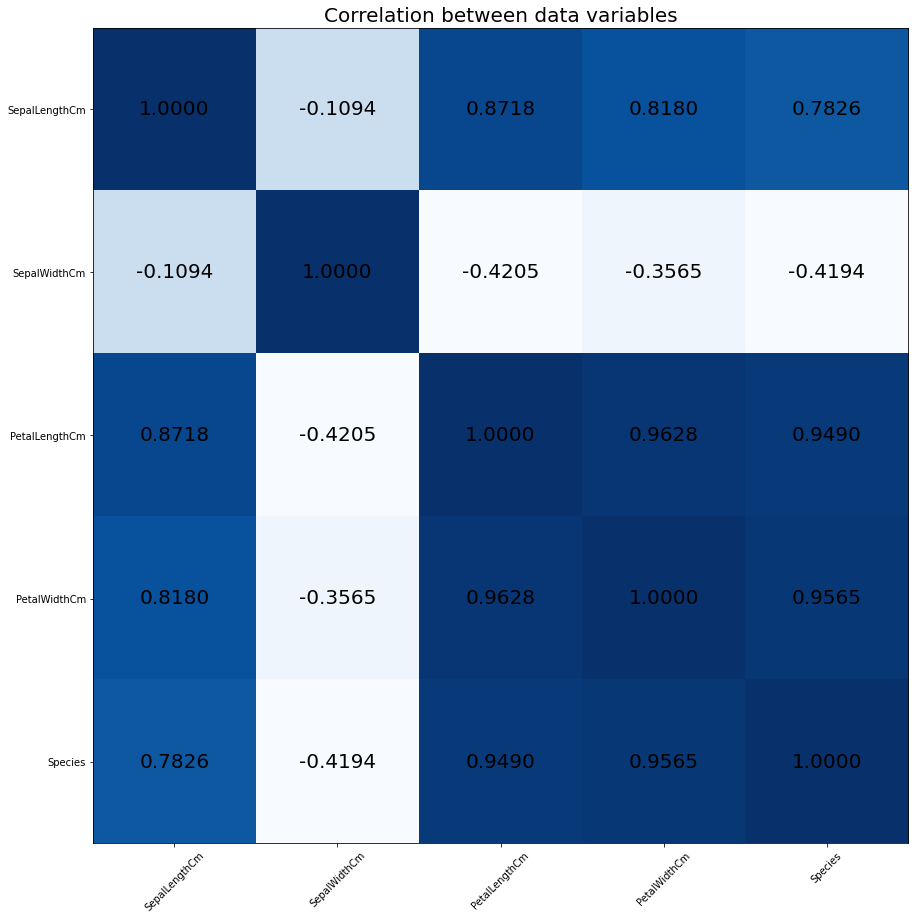

In [19]:
c_matrix = np.array(correlation_matrix)
column_name = list(correlation_matrix.columns)
plt.figure(figsize=(15,15))
plt.title('Correlation between data variables', fontsize = 20)
plt.imshow(correlation_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.xticks(np.arange(len(column_name)), column_name, rotation=45)
plt.yticks(np.arange(len(column_name)), column_name)
for y in range(c_matrix.shape[0]):
    for x in range(c_matrix.shape[1]):
        plt.text(x, y, '%.4f' % c_matrix[y, x],
                 horizontalalignment='center',
                 verticalalignment='center',fontsize = 20
                 )
plt.grid(False)
plt.show()

(0.0, 5.0)

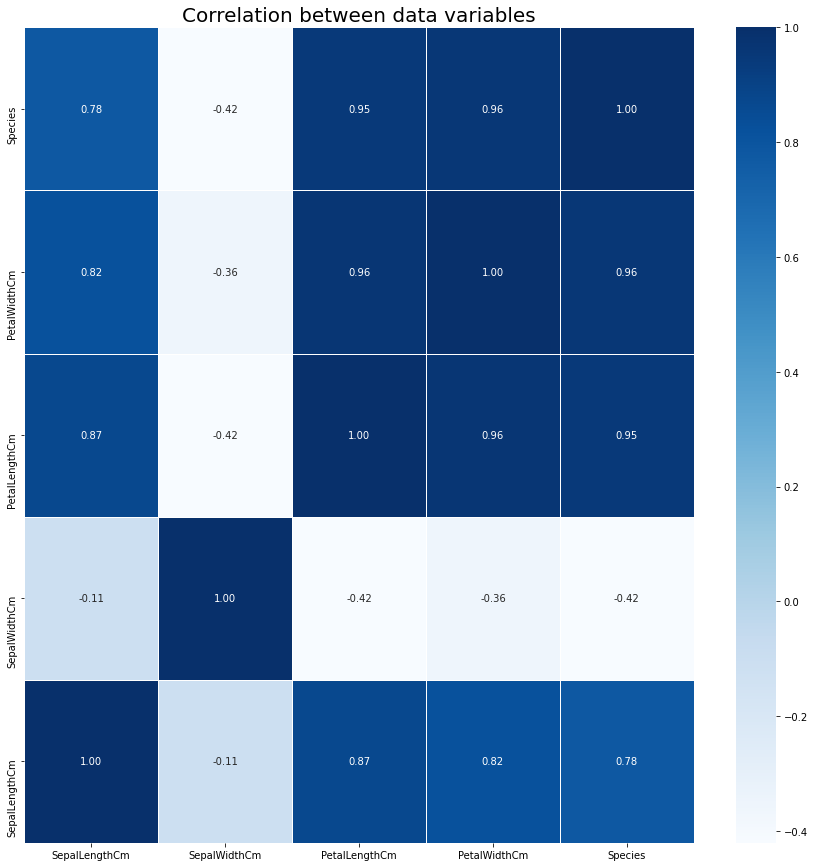

In [20]:
import seaborn as sns
plt.figure(figsize=(15,15))
plt.title('Correlation between data variables', fontsize = 20)
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
heatmap.set_ylim(0,5)

- **We choose the 3 variables ( SepalLengthCm, PetalLengthCm, PetalWidthCm )**



- **Select Variables close to 1**

## 3.2 Select_Variables_Combined

In [92]:
val_SepalWidthCm = df['SepalWidthCm'].values
val_SepalLengthCm = df['SepalLengthCm'].values
val_PetalWidthCm = df['PetalWidthCm'].values

In [93]:
val_SepalWidthCm = val_SepalWidthCm.reshape(-1,1)
val_SepalLengthCm = val_SepalLengthCm.reshape(-1,1)
val_PetalWidthCm = val_PetalWidthCm.reshape(-1,1)

In [94]:
data_values = np.hstack([val_SepalWidthCm, val_SepalLengthCm, val_PetalWidthCm])

In [95]:
data_values

array([[3.5, 5.1, 0.2],
       [3. , 4.9, 0.2],
       [3.2, 4.7, 0.2],
       [3.1, 4.6, 0.2],
       [3.6, 5. , 0.2],
       [3.9, 5.4, 0.4],
       [3.4, 4.6, 0.3],
       [3.4, 5. , 0.2],
       [2.9, 4.4, 0.2],
       [3.1, 4.9, 0.1],
       [3.7, 5.4, 0.2],
       [3.4, 4.8, 0.2],
       [3. , 4.8, 0.1],
       [3. , 4.3, 0.1],
       [4. , 5.8, 0.2],
       [4.4, 5.7, 0.4],
       [3.9, 5.4, 0.4],
       [3.5, 5.1, 0.3],
       [3.8, 5.7, 0.3],
       [3.8, 5.1, 0.3],
       [3.4, 5.4, 0.2],
       [3.7, 5.1, 0.4],
       [3.6, 4.6, 0.2],
       [3.3, 5.1, 0.5],
       [3.4, 4.8, 0.2],
       [3. , 5. , 0.2],
       [3.4, 5. , 0.4],
       [3.5, 5.2, 0.2],
       [3.4, 5.2, 0.2],
       [3.2, 4.7, 0.2],
       [3.1, 4.8, 0.2],
       [3.4, 5.4, 0.4],
       [4.1, 5.2, 0.1],
       [4.2, 5.5, 0.2],
       [3.1, 4.9, 0.1],
       [3.2, 5. , 0.2],
       [3.5, 5.5, 0.2],
       [3.1, 4.9, 0.1],
       [3. , 4.4, 0.2],
       [3.4, 5.1, 0.2],
       [3.5, 5. , 0.3],
       [2.3, 4.5

# 4. Clustering_Algorithm

- **k-means clustering Algorithm is simple unsupervised Algoritm**

## 4.1 K-means

In [96]:
from sklearn.cluster import KMeans

### 4.1.1 K-means_Cost

In [97]:
'''
cost_check, centroid number(range_1~11), cost=abs(kmeans.score(data_values))
'''
cost = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state=0).fit(data_values)
    cost.append(abs(kmeans.score(data_values)))

In [98]:
cost

[216.96066666666667,
 83.20827546296296,
 48.75278454106277,
 39.374525925925916,
 32.09847027972028,
 26.553568892911407,
 23.122247914746985,
 21.031407035798342,
 19.108677097756036,
 17.223802031302036]

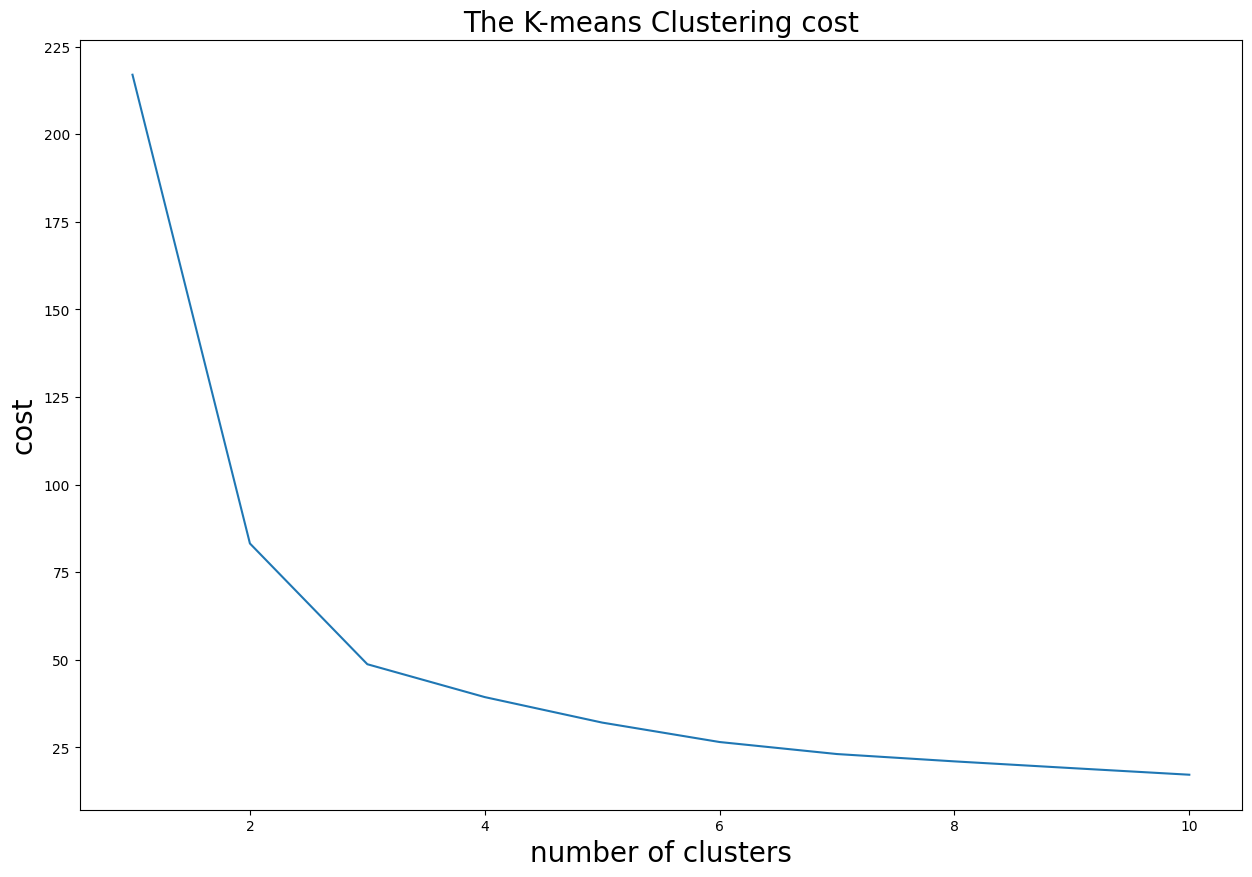

In [99]:
plt.figure(figsize=(15,10))
plt.plot(range(1,11), cost)
plt.title('The K-means Clustering cost', fontsize = 20)
plt.xlabel('number of clusters', fontsize = 20)
plt.ylabel('cost', fontsize = 20)
plt.show()

### 4.1.2 K-means_Clustering

In [100]:
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(data_values)

In [101]:
real_values = df["Species"].astype('int')

In [102]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [103]:
'''
Print the number of each label in original dataset
'''
print("Real Values :",len(real_values))
print("The number of observations assigned class 0 is",real_values[np.where(real_values==0)[0]].count())
print("The number of observations assigned class 1 is",real_values[np.where(real_values==1)[0]].count())
print("The number of observations assigned class 2 is",real_values[np.where(real_values==2)[0]].count())

Real Values : 150
The number of observations assigned class 0 is 50
The number of observations assigned class 1 is 50
The number of observations assigned class 2 is 50


In [104]:
'''
Print the number of predicted label
'''
print("Result of kmeans :",len(y_kmeans))
print("The number of observations assigned cluster 0 is",y_kmeans[(y_kmeans==0)].shape[0])
print("The number of observations assigned cluster 1 is",y_kmeans[(y_kmeans==1)].shape[0])
print("The number of observations assigned cluster 2 is",y_kmeans[(y_kmeans==2)].shape[0])

Result of kmeans : 150
The number of observations assigned cluster 0 is 50
The number of observations assigned cluster 1 is 46
The number of observations assigned cluster 2 is 54


## 4.2 K-means_Visualization

In [105]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

### 4.2.1 Visualization_Real

<ipython-input-106-085192536ae2>:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=Axes3D(fig)


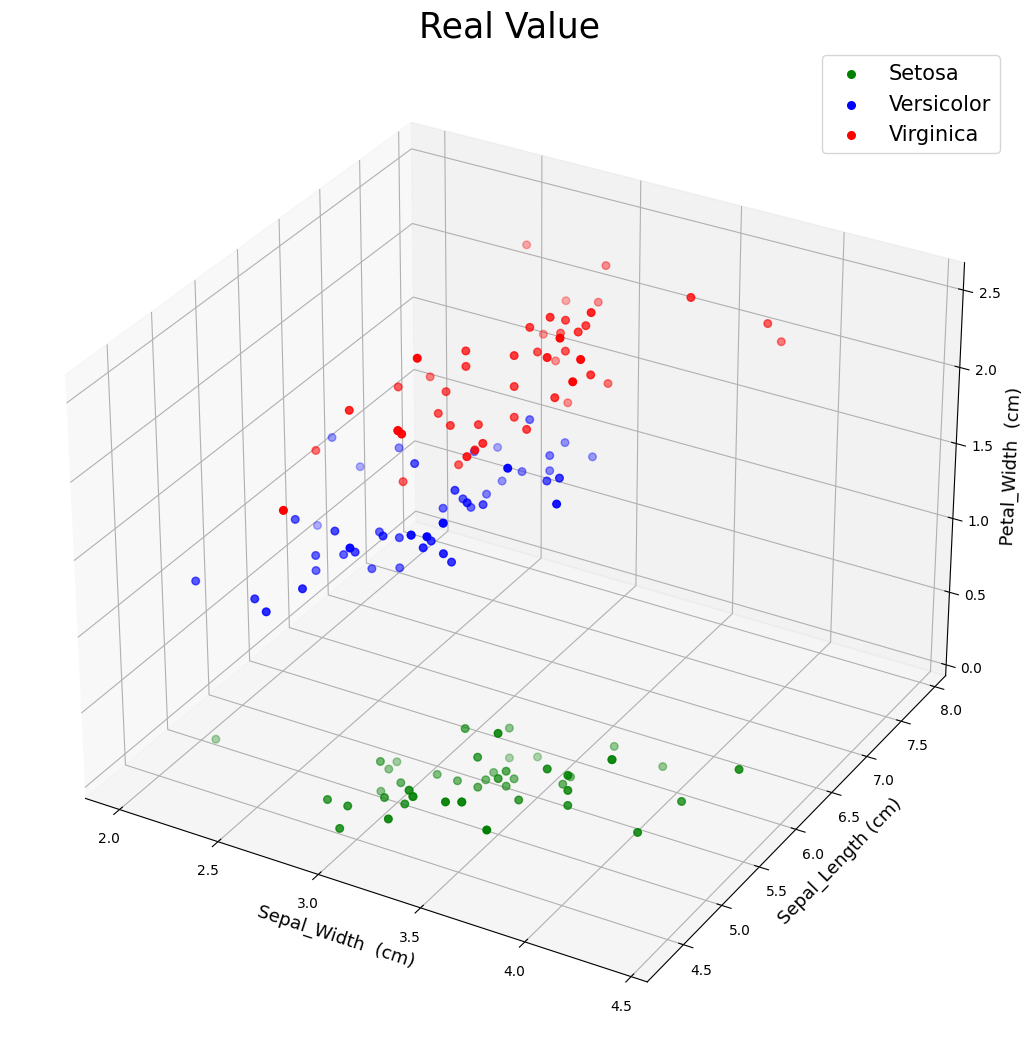

In [106]:
plt.style.use('default')
fig=plt.figure(figsize=(15,10))
ax=Axes3D(fig)
ax.scatter(data_values[real_values == 0, 0], data_values[real_values == 0, 1], data_values[real_values == 0, 2], s = 30, c = 'green', label = 'Setosa')
ax.scatter(data_values[real_values == 1, 0], data_values[real_values == 1, 1], data_values[real_values == 1, 2], s = 30, c = 'blue', label = 'Versicolor')
ax.scatter(data_values[real_values == 2, 0], data_values[real_values == 2, 1], data_values[real_values == 2, 2], s = 30, c = 'red', label = 'Virginica')
ax.set_title('Real Value', size = 25)
ax.set_xlabel('Sepal_Width  (cm)', size = 13)
ax.set_ylabel('Sepal_Length (cm)', size = 13)
ax.set_zlabel('Petal_Width  (cm)', size = 13)
plt.legend(fontsize=15)
plt.show()

### 4.2.2 Visualization_K-means

<ipython-input-107-871ad27e13a3>:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=Axes3D(fig)


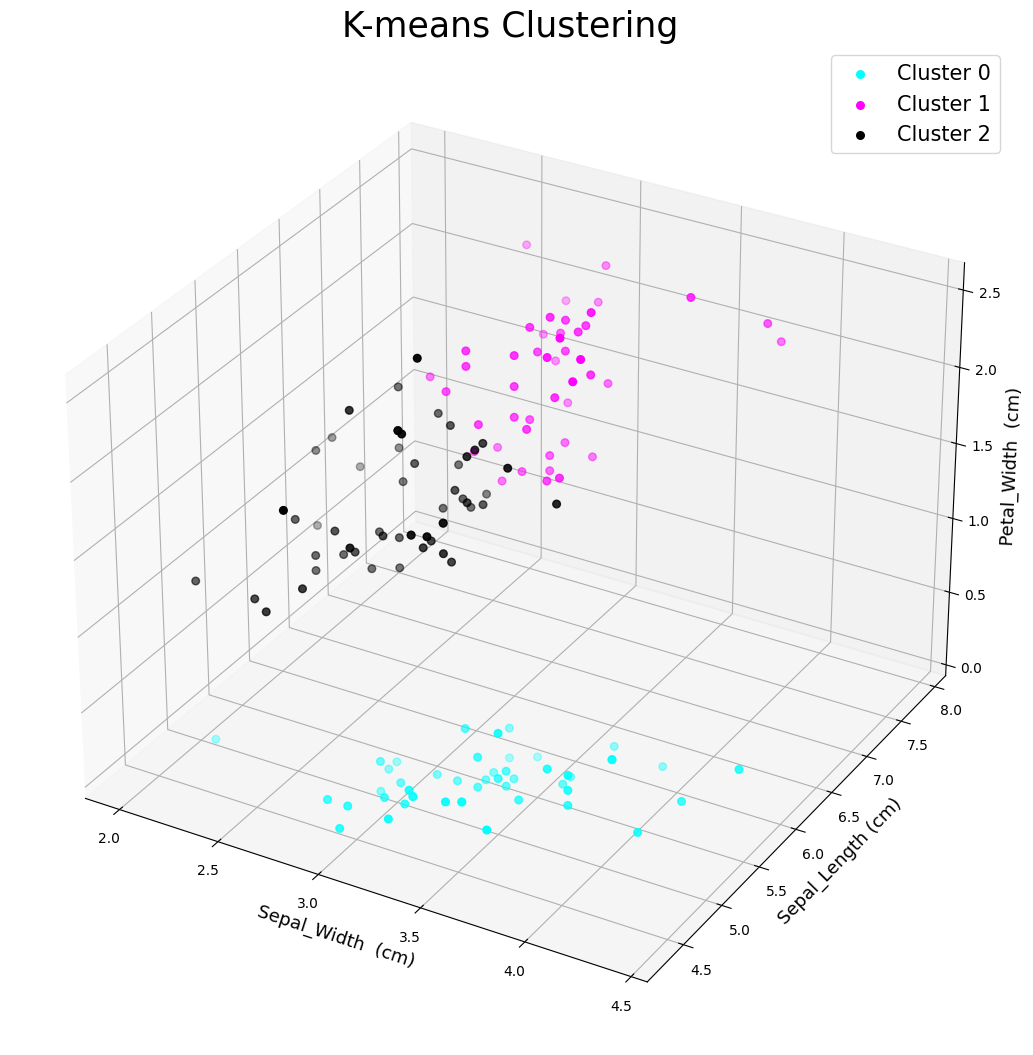

In [107]:
plt.style.use('default')
fig=plt.figure(figsize=(15,10))
ax=Axes3D(fig)
ax.scatter(data_values[y_kmeans == 0, 0], data_values[y_kmeans == 0, 1], data_values[y_kmeans == 0, 2], s = 30, c = 'cyan', label = 'Cluster 0')
ax.scatter(data_values[y_kmeans == 1, 0], data_values[y_kmeans == 1, 1], data_values[y_kmeans == 1, 2], s = 30, c = 'magenta', label = 'Cluster 1')
ax.scatter(data_values[y_kmeans == 2, 0], data_values[y_kmeans == 2, 1], data_values[y_kmeans == 2, 2], s = 30, c = 'black', label = 'Cluster 2')
ax.set_title('K-means Clustering', size = 25)
ax.set_xlabel('Sepal_Width  (cm)', size = 13)
ax.set_ylabel('Sepal_Length (cm)', size = 13)
ax.set_zlabel('Petal_Width  (cm)', size = 13)
plt.legend(fontsize=15)
plt.show()

**Clustering**
- **Cluster 0 = Setosa, Cluster 1 = Virginica, Cluster 2 = Versicolor**

### 4.2.3 Visualization_K-means with centroid

In [108]:
kmeansmodel.cluster_centers_

array([[3.418     , 5.006     , 0.244     ],
       [3.07826087, 6.82173913, 1.96304348],
       [2.6962963 , 5.78518519, 1.43148148]])

<ipython-input-109-d6d6cd422016>:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=Axes3D(fig)


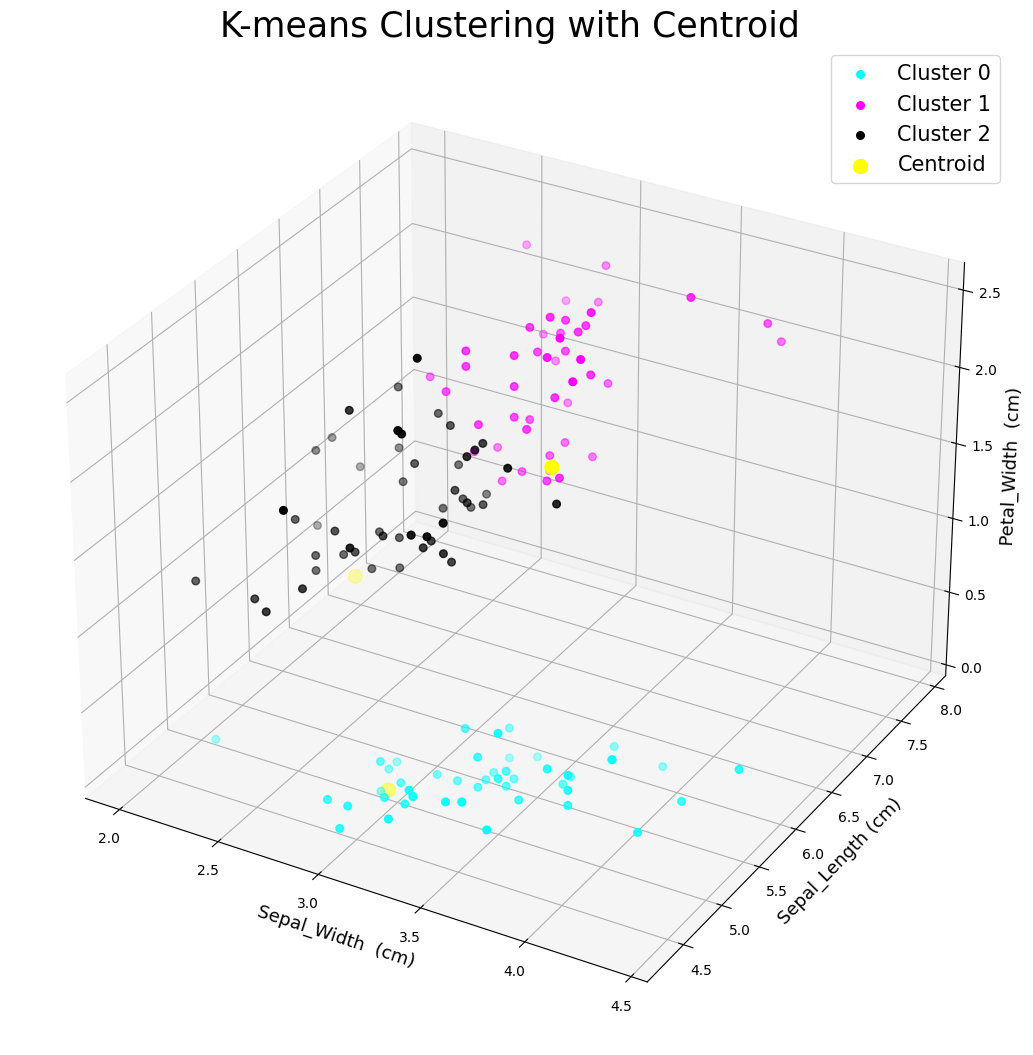

In [109]:
plt.style.use('default')
fig=plt.figure(figsize=(15,10))
ax=Axes3D(fig)
ax.scatter(data_values[y_kmeans == 0, 0], data_values[y_kmeans == 0, 1], data_values[y_kmeans == 0, 2], s = 30, c = 'cyan', label = 'Cluster 0')
ax.scatter(data_values[y_kmeans == 1, 0], data_values[y_kmeans == 1, 1], data_values[y_kmeans == 1, 2], s = 30, c = 'magenta', label = 'Cluster 1')
ax.scatter(data_values[y_kmeans == 2, 0], data_values[y_kmeans == 2, 1], data_values[y_kmeans == 2, 2], s = 30, c = 'black', label = 'Cluster 2')
ax.scatter(kmeansmodel.cluster_centers_[0:3, 0], kmeans.cluster_centers_[0:3, 1], kmeans.cluster_centers_[0:3, 2], s = 100, c = 'yellow', label = 'Centroid')
ax.set_title('K-means Clustering with Centroid', size = 25)
ax.set_xlabel('Sepal_Width  (cm)', size = 13)
ax.set_ylabel('Sepal_Length (cm)', size = 13)
ax.set_zlabel('Petal_Width  (cm)', size = 13)
plt.legend(fontsize=15)
plt.show()

## 4.3 K-means_Accuracy

### 4.3.1 Accuracy_Label Check

**Ture(Species)** 
- **Class 0 = Setosa, Class 1 = Versicolor, Class 2 = Virginica**

**Clustering(y_kmeans)**
- **Cluster 0 = Setosa, Cluster 1 = Virginica, Cluster 2 = Versicolor**

### 4.3.2 Accuracy_Calculation

In [110]:
temp = iris['Species'].values
real_species = temp.reshape(-1,1)

In [111]:
kmeans_species = []
for sp in y_kmeans:
    if sp == 0:
        sp = 'Iris-setosa'
        kmeans_species.append(sp)
    elif sp == 2:
        sp = 'Iris-versicolor'
        kmeans_species.append(sp)
    else:
        sp = 'Iris-virginica'
        kmeans_species.append(sp)

In [112]:
kmeans_species

['Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris

In [113]:
real_species.shape

(150, 1)

In [114]:
kmeans_species = np.array(kmeans_species)
kmeans_species = kmeans_species.reshape(-1,1)
kmeans_species.shape

(150, 1)

In [115]:
i = 0
j = 0
for real, predict in zip(real_species,kmeans_species):
    print(real, predict)
    if real == predict:
        i += 1
    j += 1

['Iris-setosa'] ['Iris-setosa']
['Iris-setosa'] ['Iris-setosa']
['Iris-setosa'] ['Iris-setosa']
['Iris-setosa'] ['Iris-setosa']
['Iris-setosa'] ['Iris-setosa']
['Iris-setosa'] ['Iris-setosa']
['Iris-setosa'] ['Iris-setosa']
['Iris-setosa'] ['Iris-setosa']
['Iris-setosa'] ['Iris-setosa']
['Iris-setosa'] ['Iris-setosa']
['Iris-setosa'] ['Iris-setosa']
['Iris-setosa'] ['Iris-setosa']
['Iris-setosa'] ['Iris-setosa']
['Iris-setosa'] ['Iris-setosa']
['Iris-setosa'] ['Iris-setosa']
['Iris-setosa'] ['Iris-setosa']
['Iris-setosa'] ['Iris-setosa']
['Iris-setosa'] ['Iris-setosa']
['Iris-setosa'] ['Iris-setosa']
['Iris-setosa'] ['Iris-setosa']
['Iris-setosa'] ['Iris-setosa']
['Iris-setosa'] ['Iris-setosa']
['Iris-setosa'] ['Iris-setosa']
['Iris-setosa'] ['Iris-setosa']
['Iris-setosa'] ['Iris-setosa']
['Iris-setosa'] ['Iris-setosa']
['Iris-setosa'] ['Iris-setosa']
['Iris-setosa'] ['Iris-setosa']
['Iris-setosa'] ['Iris-setosa']
['Iris-setosa'] ['Iris-setosa']
['Iris-setosa'] ['Iris-setosa']
['Iris-s

In [116]:
accuracy = np.round((i/j)*100,1)

In [117]:
print('K-means Total accuracy :{}'.format(accuracy),'%')

K-means Total accuracy :82.7 %


### 4.3.3 Accuracy_Case by Case

In [118]:
'''
Calculate Accuracy_Case by Case
'''
re_se = 0
to_se = 0
re_vi = 0
to_vi = 0
re_ve = 0
to_ve = 0

for idx, real in enumerate(real_species):
    if real == 'Iris-setosa':
        to_se += 1
        if kmeans_species[idx] == real:
            re_se += 1
    elif real == 'Iris-virginica':
        to_vi += 1
        if kmeans_species[idx] == real:
            re_vi += 1
    else :
        to_ve += 1
        if kmeans_species[idx] == real:
            re_ve += 1

print('K-means setosa accuracy :{} %'.format((re_se/to_se)*100))
print('K-means virginica accuracy :{} %'.format((re_vi/to_vi)*100))
print('K-means versicolor accuracy :{} %'.format((re_ve/to_ve)*100))

K-means setosa accuracy :100.0 %
K-means virginica accuracy :70.0 %
K-means versicolor accuracy :78.0 %


In [119]:
'''
setosa accuracy
'''
kmean_set = np.where((kmeans_species[np.where(real_species=='Iris-setosa')[0]] == 'Iris-setosa')==True)[0].shape[0]
real_set = np.where(real_species=='Iris-setosa')[0].shape[0]

set_acc = (kmean_set/real_set)*100

print('K-means setosa accuracy :{} %'.format(set_acc))

K-means setosa accuracy :100.0 %


In [120]:
'''
virginica accuracy
'''
kmean_vir = np.where((kmeans_species[np.where(real_species=='Iris-virginica')[0]] == 'Iris-virginica')==True)[0].shape[0]
real_vir = np.where(real_species=='Iris-virginica')[0].shape[0]

vir_acc = (kmean_vir/real_vir)*100

print('K-means virginica accuracy :{} %'.format(vir_acc))

K-means virginica accuracy :70.0 %


In [121]:
'''
versicolor accuracy
'''
kmean_ver = np.where((kmeans_species[np.where(real_species=='Iris-versicolor')[0]] == 'Iris-versicolor')==True)[0].shape[0]
real_ver = np.where(real_species=='Iris-versicolor')[0].shape[0]

ver_acc = (kmean_ver/real_ver)*100

print('K-means versicolor accuracy :{} %'.format(ver_acc))

K-means versicolor accuracy :78.0 %
